# Description

- Initialize with returns, predictions, target volatility, and oos start date
- Evaluate portfolios generated from the predictions

- TODO(gp): This should be called `Master_model_evaluator` like the class

# Imports

In [3]:
%load_ext autoreload
%autoreload 2

import logging

import core.config as cconfig
import core.dataflow_model.model_evaluator as modeval
import core.dataflow_model.model_plotter as modplot
import core.dataflow_model.utils as cdmu
import helpers.dbg as dbg
import helpers.printing as hprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dbg.init_logger(verbosity=logging.INFO)
# dbg.init_logger(verbosity=logging.DEBUG)

_LOG = logging.getLogger(__name__)

# _LOG.info("%s", env.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-9d72ee87-226a-4186-82f7-20672e16e94a.json'


# Notebook config

In [28]:
# Read from env var.
eval_config = cconfig.Config.from_env_var("AM_CONFIG_CODE")

# Override config.
if eval_config is None:
    # experiment_dir = "s3://eglp-spm-sasm/experiments/experiment.RH2Ef.v1_9-all.5T.20210831-004747.run1.tgz"
    experiment_dir = "/app/oos_experiment.RH2Eg.v2_0-top100.5T.run1_test"
    aws_profile = None
    selected_idxs = None

    eval_config = cconfig.get_config_from_nested_dict(
        {
            "load_experiment_kwargs": {
                "src_dir": experiment_dir,
                "file_name": "result_bundle.v2_0.pkl",
                "experiment_type": "ins_oos",
                "selected_idxs": selected_idxs,
                "aws_profile": aws_profile,
            },
            "model_evaluator_kwargs": {
                "predictions_col": "mid_ret_0_vol_adj_clipped_2_hat",
                "target_col": "mid_ret_0_vol_adj_clipped_2",
                # "oos_start": "2017-01-01",
                "oos_start": None,
                "abort_on_error": True,
            },
            "bh_adj_threshold": 0.1,
            "resample_rule": "W",
            "mode": "ins",
            "target_volatility": 0.1,
        }
    )

print(str(eval_config))

Environment variable 'AM_CONFIG_CODE' not defined: no config retrieved
load_experiment_kwargs:
  src_dir: /app/dataflow_lemonade/RH1E/test/Test_RH1E_ProdModels.test_end_to_end_slow1/tmp.scratch/run_model/oos_experiment.RH1E.kibot_v1-top1.5T
  file_name: result_bundle.v2_0.pkl
  experiment_type: ins_oos
  selected_idxs: None
  aws_profile: None
model_evaluator_kwargs:
  predictions_col: ret_0_vol_adj_2
  target_col: ret_0_vol_adj_2_hat
  oos_start: None
  abort_on_error: True
bh_adj_threshold: 0.1
resample_rule: W
mode: ins
target_volatility: 0.1


# Initialize ModelEvaluator and ModelPlotter

In [29]:
# Build the ModelEvaluator from the eval config.
evaluator = modeval.ModelEvaluator.from_eval_config(eval_config)

# Build the ModelPlotter.
plotter = modplot.ModelPlotter(evaluator)

Before load_experiment_artifacts: memory_usage=rss=0.405GB vms=3.367GB mem_pct=3%
# Load artifacts 'result_bundle.v2_0.pkl' from '/app/dataflow_lemonade/RH1E/test/Test_RH1E_ProdModels.test_end_to_end_slow1/tmp.scratch/run_model/oos_experiment.RH1E.kibot_v1-top1.5T'
Found 1 experiment subdirs in '/app/dataflow_lemonade/RH1E/test/Test_RH1E_ProdModels.test_end_to_end_slow1/tmp.scratch/run_model/oos_experiment.RH1E.kibot_v1-top1.5T'


Loading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

load_experiment_artifacts: memory_usage=rss=0.571GB vms=3.453GB mem_pct=5%
After load_experiment_artifacts: memory_usage=rss=0.571GB vms=3.453GB mem_pct=5%
Before building ModelEvaluator: memory_usage=rss=0.571GB vms=3.453GB mem_pct=5%
After building ModelEvaluator: memory_usage=rss=0.606GB vms=3.489GB mem_pct=5%


# Analysis

In [30]:
pnl_stats = evaluator.calculate_stats(
    mode=eval_config["mode"], target_volatility=eval_config["target_volatility"]
)
display(pnl_stats)

Calculating positions:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating stats:   0%|          | 0/1 [00:00<?, ?it/s]

0
finance        avg_turnover_(%)                                   144.823011
               turnover_frequency                              <5 * Minutes>
               avg_holding_period                                   0.690498
               holding_period_units                            <5 * Minutes>
sampling       start_time                                2006-03-02 15:10:00
               end_time                                  2020-08-28 15:50:00
               n_sampling_points                                      262072
               frequency                                       <5 * Minutes>
               sampling_points_per_year                           105156.125
               time_span_in_years                                  14.496474
               n_rows                                                2383039
               frac_zero                                            0.006899
               frac_nan                                             0.890026
               frac_inf                                                  0.0
               frac_constant                                        0.000819
               num_finite_samples                                     262072
               num_finite_samples_inv                               0.000004
               num_finite_samples_inv_dyadic_scale                       -18
               num_finite_samples_sqrt                            511.929683
               num_finite_samples_sqrt_inv                          0.001953
               num_finite_samples_sqrt_inv_dyadic_scale                   -9
               num_unique_values                                      245633
summary        scipy.mean                                           0.000004
               scipy.std                                             0.00093
               scipy.skew                                           0.011637
               scipy.kurtosis                                     189.267443
               null_mean_zero.tval                                  2.275431
               null_mean_zero.pval                                  0.022881
               jensen_ratio                                         0.320906
               count                                                262072.0
               mean                                                 0.000004
               std                                                   0.00093
               min                                                 -0.032195
               25%                                                 -0.000077
               50%                                                      -0.0
               75%                                                  0.000082
               max                                                  0.032492
stationarity   adf.stat                                          -124.661264
               adf.pval                                                  0.0
               adf.used_lag                                             15.0
               adf.nobs                                             262056.0
               adf.critical_values_1%                              -3.430375
               adf.critical_values_5%                              -2.861551
               adf.critical_values_10%                             -2.566776
               adf.ic_best                                   -2915148.259345
               kpss.stat                                            0.056946
               kpss.pval                                                 0.1
               kpss.lags                                                16.0
               kpss.critical_values_1%                                 0.739
               kpss.critical_values_5%                                 0.463
               kpss.critical_values_10%                                0.347
normality      omnibus_null_normal.stat                        114316.3

## Model selection

In [ ]:
plotter.plot_multiple_tests_adjustment(
    threshold=eval_config["bh_adj_threshold"], mode=eval_config["mode"]
)

In [ ]:
# TODO(gp): Move this chunk of code in a function.
col_mask = (
    pnl_stats.loc["signal_quality"].loc["sr.adj_pval"]
    < eval_config["bh_adj_threshold"]
)
selected = pnl_stats.loc[:, col_mask].columns.to_list()
not_selected = pnl_stats.loc[:, ~col_mask].columns.to_list()

print("num model selected=%s" % hprint.perc(len(selected), pnl_stats.shape[1]))
print("model selected=%s" % selected)
print("model not selected=%s" % not_selected)

# Use `selected = None` to show all the models.

Calculating positions:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating positions:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/1 [00:00<?, ?it/s]

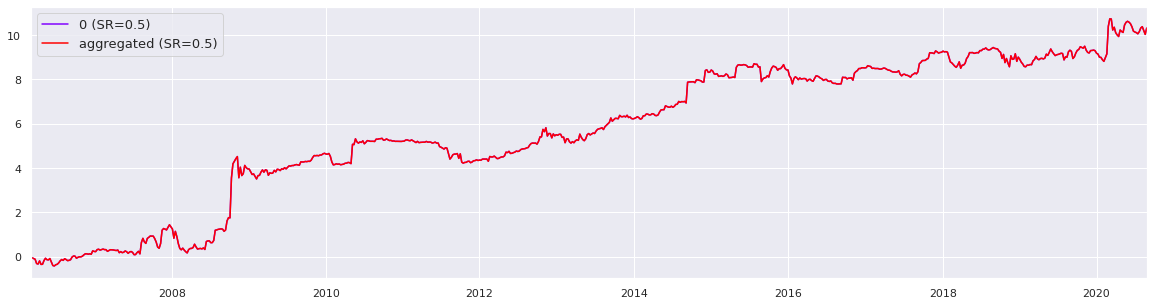

In [32]:
#selected = None
plotter.plot_multiple_pnls(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Return correlation

In [ ]:
plotter.plot_correlation_matrix(
    series="returns",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

In [ ]:
plotter.plot_effective_correlation_rank(
    series="returns",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Model correlation

In [ ]:
plotter.plot_correlation_matrix(
    series="pnl",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

In [ ]:
plotter.plot_effective_correlation_rank(
    series="pnl",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Aggregate model

In [33]:
pnl_srs, pos_srs, aggregate_stats = evaluator.aggregate_models(
    keys=selected,
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)
display(aggregate_stats)

Calculating positions:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/1 [00:00<?, ?it/s]

finance         avg_turnover_(%)                                     144.823011
                turnover_frequency                                <5 * Minutes>
                avg_holding_period                                     0.690498
                holding_period_units                              <5 * Minutes>
sampling        start_time                                  2006-03-02 15:10:00
                end_time                                    2020-08-28 15:50:00
                n_sampling_points                                        262072
                frequency                                         <5 * Minutes>
                sampling_points_per_year                             105156.125
                time_span_in_years                                    14.496474
                n_rows                                                  2383039
                frac_zero                                              0.006899
                frac_nan                

In [ ]:
plotter.plot_sharpe_ratio_panel(keys=selected, mode=eval_config["mode"])

In [ ]:
plotter.plot_rets_signal_analysis(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

In [ ]:
plotter.plot_performance(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

In [ ]:
plotter.plot_rets_and_vol(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

In [ ]:
if False:
    plotter.plot_positions(
        keys=selected,
        mode=eval_config["mode"],
        target_volatility=eval_config["target_volatility"],
    )

In [ ]:
if False:
    # Plot the returns and prediction for one or more models.
    model_key = selected[:1]
    plotter.plot_returns_and_predictions(
        keys=model_key,
        resample_rule=eval_config["resample_rule"],
        mode=eval_config["mode"],
    )